# Рейтинг стабильности абсолютных курсов валют

С помощью абсолютных валютных курсов исследуем волатильность мировых валют. 

Для расчета волатильности используем отношение стандартного отклонения к среднему значению за разные промежутки времени (5 лет, год, полгода, квартал и месяц).

Результаты выводим в виде столбчатых диаграмм (рейтинг). 

Так же выводим графики абсолютных курсов самых стабильных и самых волатильных валют. Данные на них нормированы к 100% средних значений.

# Проект: **Абсолютный курс**
	
сайт	http://www.abscur.ru

ВКонтакте	https://vk.com/abscur

FaceBook	https://www.facebook.com/abscur

WhatsUp	https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber	https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram	https://t.me/AbsCur

Одноклассники	https://ok.ru/group/53547043520717

Twitter	https://twitter.com/abscurs

GitHub	https://github.com/prog815/abscur

YouTube	https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW

# Статья

Habr - https://habr.com/ru/post/650681/ 

Сайт - https://www.abscur.ru/p/blog-page_17.html 

Google.Docs - https://docs.google.com/document/d/1RhR9EmGYFF07WK7cbgLd4nkvG_rL1OXHZStSMcjlE3Y/edit?usp=sharing 

VC - https://vc.ru/finance/362783-reyting-stabilnosti-mirovyh-valyut-na-osnove-ih-absolyutnyh-kursov 

Smart-lab - https://smart-lab.ru/blog/765885.php 

Kaggle - https://www.kaggle.com/eavprog/abs-reit-stab



In [1]:
import numpy as np 
import pandas as pd
import datetime

# Загрузка абсолютных курсов

In [2]:
data = pd.read_csv('../input/abscur/close_abs.csv',index_col='Date')
data

,AUD,CAD,HKD,JPY,SEK,USD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-27,12.707662,12.628152,2.134768,0.147652,1.832696,16.570447,16.417864,17.473901,2.408537,0.647274,...,0.159669,4.052841,4.551821,3.879304,4.419022,0.475588,4.604194,0.540564,0.617678,0.000728
2017-02-28,12.735078,12.582107,2.137765,0.147133,1.831139,16.590732,16.433774,17.556971,2.416267,0.650186,...,0.158460,4.072045,4.558770,3.893076,4.429747,0.476198,4.599721,0.541261,0.613563,0.000729
2017-03-01,12.688710,12.474608,2.139114,0.146810,1.835955,16.606034,16.491160,17.539620,2.419103,0.649514,...,0.158606,4.076471,4.563100,3.884907,4.433714,0.475409,4.559342,0.541972,0.610965,0.000742
2017-03-02,12.743684,12.463166,2.143677,0.145797,1.837701,16.641409,16.469319,17.527312,2.419234,0.648854,...,0.159020,4.097466,4.572695,3.878483,4.443634,0.475333,4.558665,0.541061,0.619561,0.000740
2017-03-03,12.627507,12.455957,2.148750,0.145841,1.837562,16.679247,16.458753,17.520745,2.422956,0.648545,...,0.161214,4.078295,4.583092,3.878444,4.453619,0.475924,4.475536,0.541798,0.622755,0.000730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,13.437193,14.688083,2.402213,0.162983,1.993264,18.734885,20.345770,21.205819,2.963032,0.872542,...,0.106995,4.685385,5.146946,4.299852,4.993839,0.583060,1.376747,0.672224,0.667358,0.000821
2022-02-22,13.472992,14.700175,2.403827,0.163613,1.986585,18.747253,20.473565,21.205431,2.962015,0.869848,...,0.107151,4.666165,5.150344,4.292052,5.002323,0.581166,1.370864,0.674061,0.663747,0.000822
2022-02-23,13.545096,14.681093,2.402122,0.162805,2.010078,18.743661,20.333574,21.230372,2.964893,0.865791,...,0.107107,4.671399,5.149357,4.297822,4.996577,0.578223,1.361959,0.673327,0.653822,0.000822


# За последние 5 лет

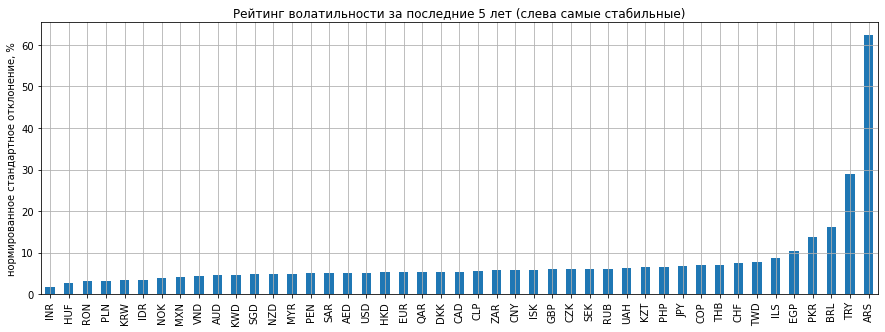

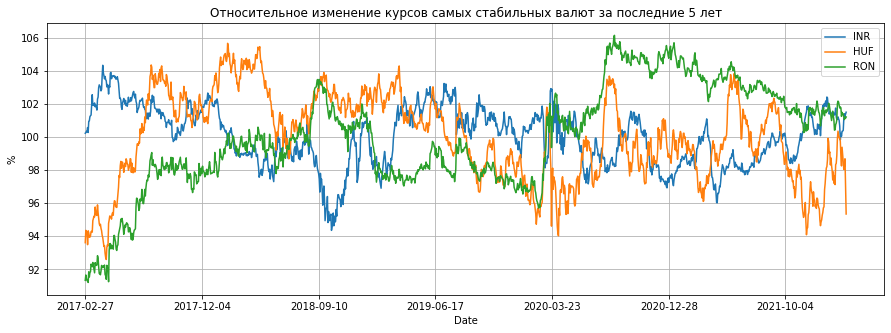

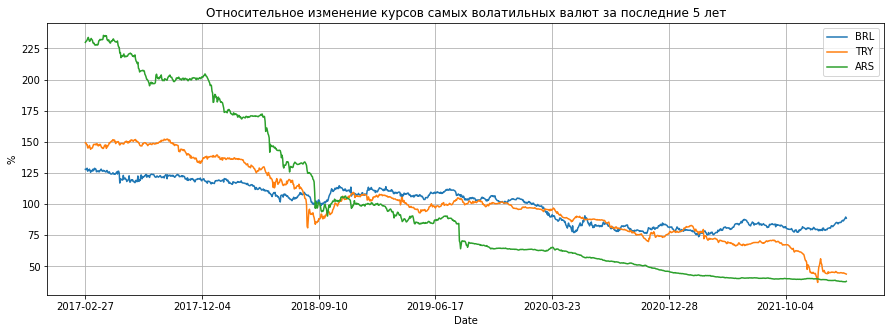

In [3]:
d = data.std()/data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг волатильности за последние 5 лет (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(data / data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последние 5 лет',ylabel='%')
_=(data / data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых волатильных валют за последние 5 лет',ylabel='%')

# За последний год

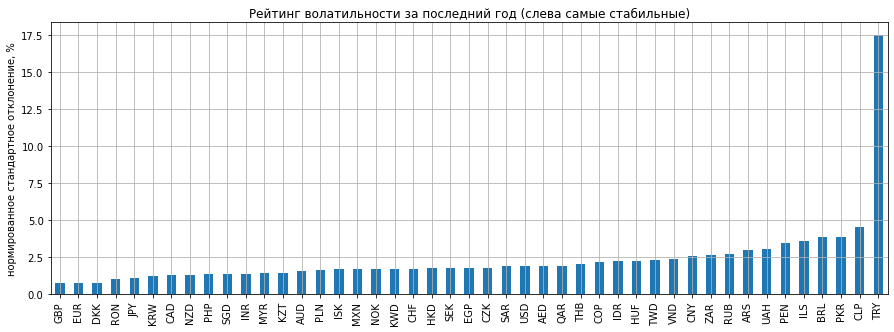

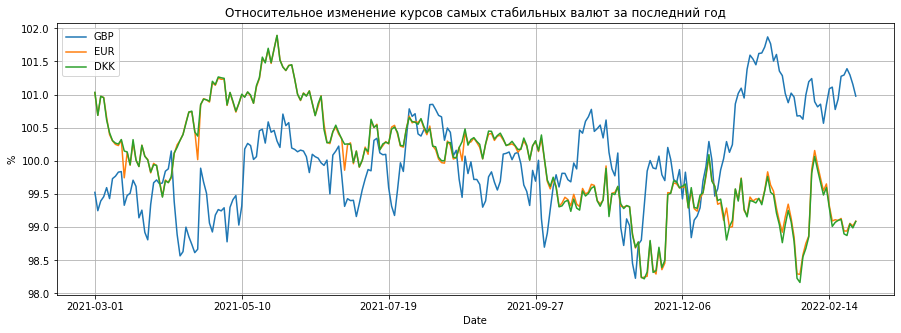

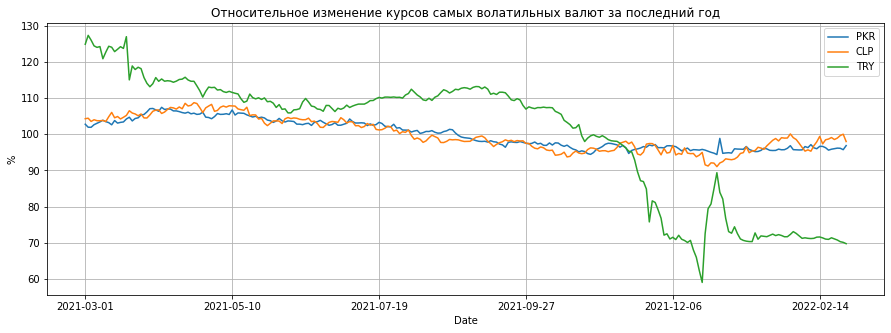

In [4]:
_data = data[data.index > str(datetime.date.today()-datetime.timedelta(days=365))]
d = _data.std()/_data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг волатильности за последний год (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(_data / _data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последний год',ylabel='%')
_=(_data / _data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых волатильных валют за последний год',ylabel='%')

# За последние полгода

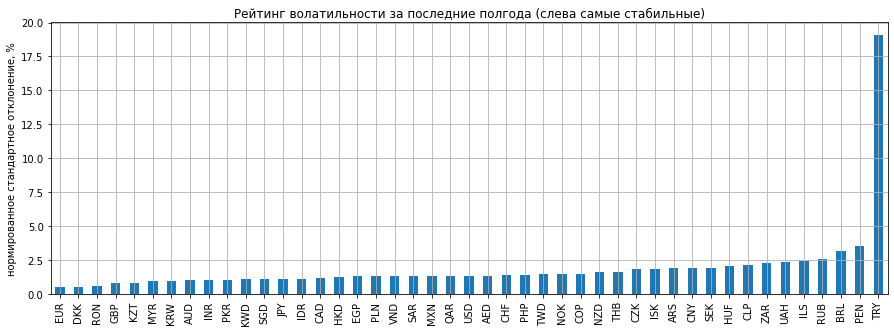

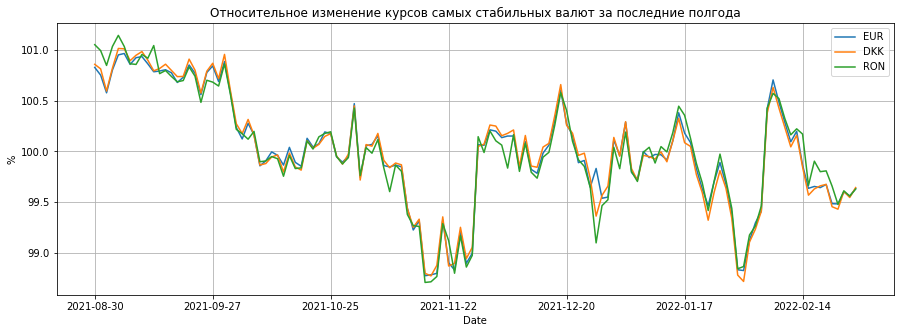

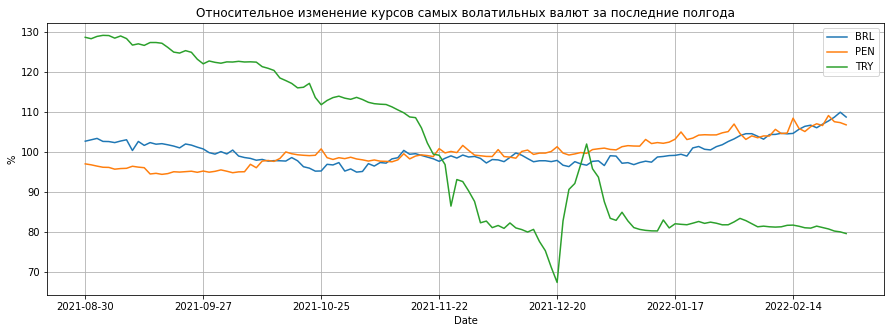

In [5]:
_data = data[data.index > str(datetime.date.today()-datetime.timedelta(days=183))]
d = _data.std()/_data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг волатильности за последние полгода (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(_data / _data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последние полгода',ylabel='%')
_=(_data / _data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых волатильных валют за последние полгода',ylabel='%')

# За последний квартал

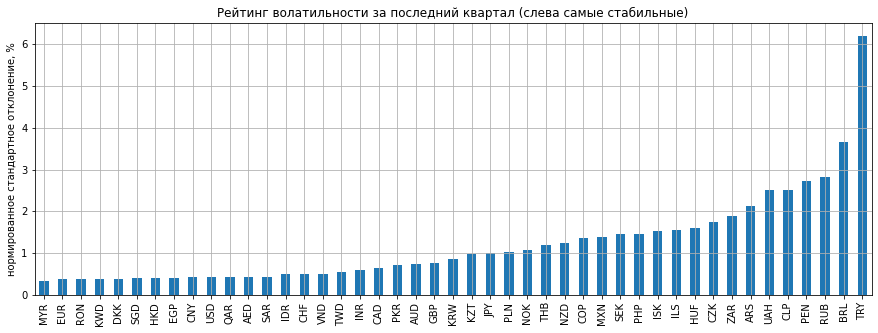

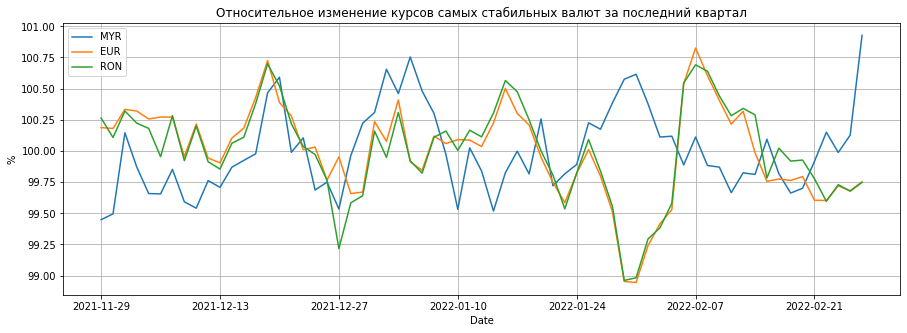

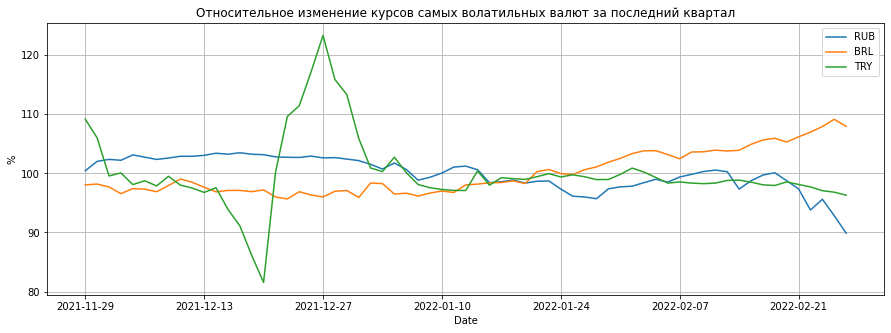

In [6]:
_data = data[data.index > str(datetime.date.today()-datetime.timedelta(days=92))]
d = _data.std()/_data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг волатильности за последний квартал (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(_data / _data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последний квартал',ylabel='%')
_=(_data / _data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых волатильных валют за последний квартал',ylabel='%')

# За последний месяц

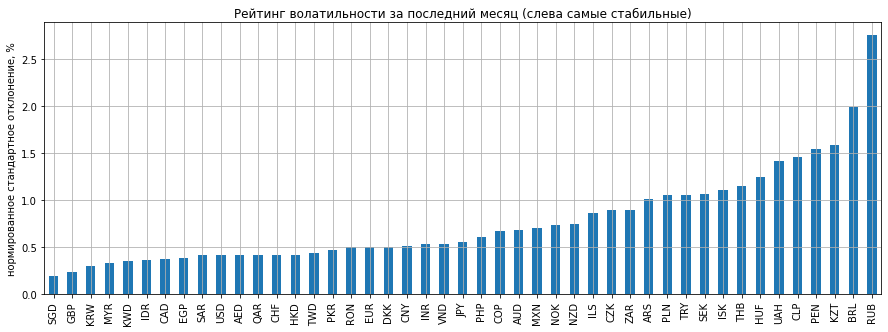

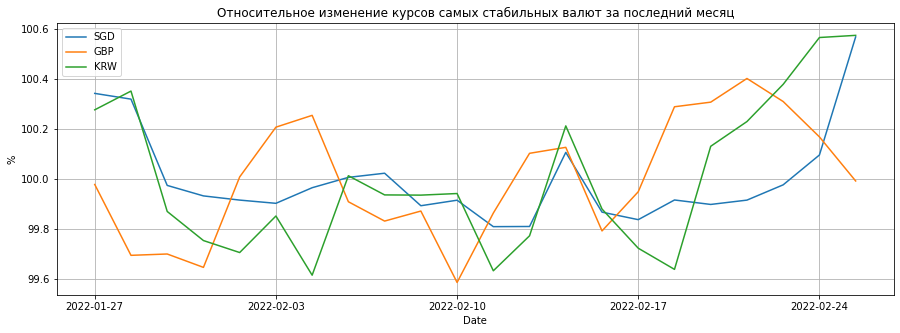

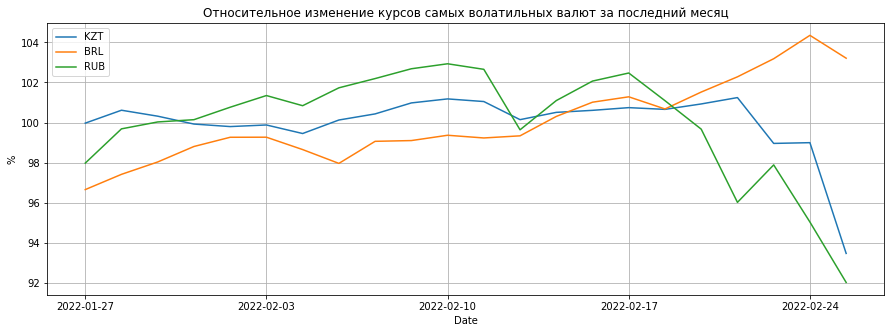

In [7]:
_data = data[data.index > str(datetime.date.today()-datetime.timedelta(days=31))]
d = _data.std()/_data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг волатильности за последний месяц (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(_data / _data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последний месяц',ylabel='%')
_=(_data / _data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых волатильных валют за последний месяц',ylabel='%')